In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
N = 100000

def dm(s):
  display(Markdown(s))

## Data Creation and Visualization

To create random data in a certain distribution from uniformly distributed random data in the range 0 to 1, we have to determine the inverse of the CDF of our target distribution. Then we can simply apply this function to our uniform data, the result will have the target distribution.

First we must determine the CDF of the given distribution. This is simply given by $F_X(x) = P (X \leq x)$. Since our prbabilities are continuous we can express the CDF as follows:

$$
F_{Y=1}(x) = \int_{0}^{x}2x' dx' = \Big[x'^2\Big]_0^x = x^2
$$

Now we need to invert this function which is simple:

$$
y = x^2 \Rightarrow x = \sqrt{y}
$$

So our inverse CDF is:

$$
F_{Y=1}^{-1}(y) = \sqrt{y}
$$

Now we repeat that for $Y=0$:

$$
F_{Y=0}(x) = \int_{0}^{x}2-2x' dx' = \Big[2x'-x'^2\Big]_0^x = 2x-x^2
$$
$$
\Rightarrow F_{Y=0}^{-1} = 1 - \sqrt{1-y}
$$

<span style = "color:green; font-weight:bold"/> 
Likelihoods, CDFs and inverse transform sampling equal to sample solution.

In [3]:
def create_data(N):
  ys = np.random.uniform(size=N)>=0.5
  xs = np.array([np.sqrt(np.random.sample()) if y else 1-np.sqrt(1-np.random.sample()) for y in ys])
  return (xs, ys)

Lets take a look at some sample data:

Text(0.5, 1.0, 'Histogram of $X$ values')

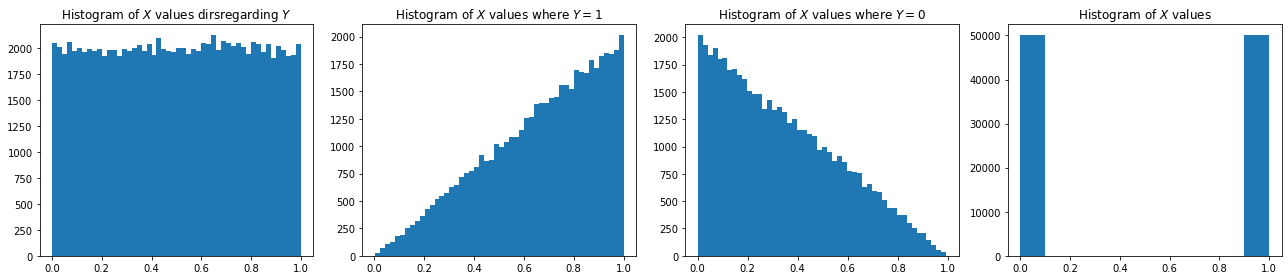

In [6]:
xs, ys = create_data(N)
fig, ax = plt.subplots(1, 4, tight_layout=True)
fig.set_figwidth(fig.get_figwidth() * 3)
ax[0].hist(xs, bins=50)
ax[0].set_title("Histogram of $X$ values dirsregarding $Y$")
ax[1].hist(xs[ys], bins=50)
ax[1].set_title("Histogram of $X$ values where $Y=1$")
ax[2].hist(xs[np.logical_not(ys)], bins=50)
ax[2].set_title("Histogram of $X$ values where $Y=0$")
ax[3].hist(ys.astype(np.int))
ax[3].set_title("Histogram of $X$ values")

<span style = "color:green; font-weight:bold"/> 
Code and analysis are essentially equal to the sample solution. This code is elegant and efficient in the definiton of create_data().

## Classification by Thresholding

In [ ]:
M = np.array([10, 100, 1000, 10000])
x_t = np.array([0.2, 0.5, 0.6])

sd = np.zeros((np.shape(M)[0], np.shape(x_t)[0]))
mean = np.zeros((np.shape(M)[0], np.shape(x_t)[0]))
s = "|$x_t$|M|mean|sd|\n|-|-|-|-|\n"
for i_x, x in enumerate(x_t):
  for i_m, m in enumerate(M):
    err = np.zeros(10)
    for i in range(10):
      xs, ys = create_data(m)
      err[i] = np.sum((xs < x) == ys)/m
    mean[i_m, i_x] = np.mean(err)
    sd[i_m, i_x] = np.std(err)
    s = s + f"|{x}|{m}|{np.mean(err):.2}|{np.std(err):.2}|" + "\n"
dm(s)

|$x_t$|M|mean|sd|
|-|-|-|-|
|0.2|10|0.36|0.16|
|0.2|100|0.33|0.048|
|0.2|1000|0.34|0.015|
|0.2|10000|0.34|0.0059|
|0.5|10|0.3|0.11|
|0.5|100|0.26|0.05|
|0.5|1000|0.26|0.016|
|0.5|10000|0.25|0.0027|
|0.6|10|0.22|0.12|
|0.6|100|0.28|0.037|
|0.6|1000|0.26|0.017|
|0.6|10000|0.26|0.0028|


We indeed observe the theoretical error rate of $\approx 25\%$ for $x_t = 0.5$

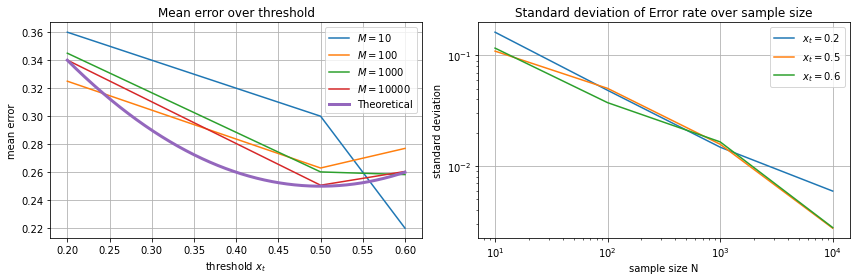

In [ ]:
def p_error(x_t):
  return 1/4+np.power(x_t-1/2, 2)
x_tc = np.linspace(0.2, 0.6, 1000)

fig, ax = plt.subplots(1, 2, tight_layout=True)
fig.set_figwidth(fig.get_figwidth() * 2)

for m in range(len(M)):
  ax[0].plot(x_t, mean[m,:], label=f"$M={M[m]}$")
ax[0].plot(x_tc, p_error(x_tc), label="Theoretical", linewidth=3)
ax[0].set_title("Mean error over threshold")
ax[0].set_xlabel("threshold $x_t$")
ax[0].set_ylabel("mean error")
ax[0].grid()
_ = ax[0].legend()


for x in range(len(x_t)):
  ax[1].loglog(M, sd[:,x], label=f"$x_t={x_t[x]}$")
ax[1].set_title("Standard deviation of Error rate over sample size")
ax[1].set_xlabel("sample size N")
ax[1].set_ylabel("standard deviation")
ax[1].grid()
_ = ax[1].legend()

<span style = "color:green; font-weight:bold"/> 
Code and analysis are essentially equal to the sample solution.

The standard deviation is probably dereasing following a function in the form of $y=ax^k$ where $k < 0 $

## Baseline Classifiers

We repeat the previous analysis for two basline Classifiers: One guesses with a 50/50 probability and the other one guesses always $Y=1$



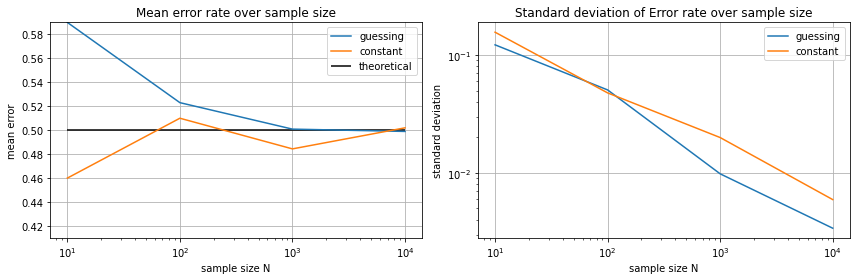

In [ ]:
sd = np.zeros((2, np.shape(M)[0]))
mean = np.zeros((2, np.shape(M)[0]))
for i_m, m in enumerate(M):
  err1 = np.zeros(10)
  err2 = np.zeros(10)
  for i in range(10):
    xs, ys = create_data(m)
    err1[i] = np.sum((np.random.uniform(size=m) >= 0.5) == ys)/m
    err2[i] = np.sum(True == ys)/m
  mean[0, i_m] = np.mean(err1)
  mean[1, i_m] = np.mean(err2)
  sd[0, i_m] = np.std(err1)
  sd[1, i_m] = np.std(err2)

fig, ax = plt.subplots(1, 2, tight_layout=True)
fig.set_figwidth(fig.get_figwidth() * 2)

ax[0].semilogx(M, mean[0], label="guessing")
ax[0].semilogx(M, mean[1], label="constant")
ax[0].hlines(0.5, M[0], M[-1], label="theoretical")
ax[0].legend()
ax[0].set_title("Mean error rate over sample size")
ax[0].set_xlabel("sample size N")
ax[0].set_ylabel("mean error")
ax[0].grid()
max_err = np.max(np.abs(mean-0.5))
ax[0].set_ylim([.5 - max_err, .5 + max_err])

ax[1].loglog(M, sd[0], label="guessing")
ax[1].loglog(M, sd[1], label="constant")
ax[1].legend()
ax[1].set_title("Standard deviation of Error rate over sample size")
ax[1].set_xlabel("sample size N")
ax[1].set_ylabel("standard deviation")
_ = ax[1].grid()

The resulting error rate is as expected, it converges to $50\%$.

<span style = "color:green; font-weight:bold"/> 
Code and analysis are essentially equal to the sample solution.

## Nearest Neighbor Classification

Now we implement the Nearest Neighbor Classifier. To generate training data wich always contains one of each class of results we generate an even number of xs for each class, instead of drawing the $Y$ values randomly.

The implemented classifier is trained in the constructor, where we calculate all bisectors, and store them in an sorted array. Performance could be gained by employing some sort of search tree, but this will suffice for a proof of concept.

In [ ]:
def create_training_data(N):
  assert(N % 2 == 0)
  ys = np.array([True, False]*(N//2))
  xs = np.array([np.sqrt(np.random.sample()) if y else 1-np.sqrt(1-np.random.sample()) for y in ys])
  return (xs, ys)

class NN:
  def __init__(self, training_data):
    s = np.argsort(training_data[0])
    self._cell_values = training_data[1][s]
    xs = training_data[0][s]
    self._cells = np.array([(xs[i-1]+xs[i])/2 for i in range(1, len(xs))])
    self.classify = np.vectorize(self.classify)

  def classify(self, x):
    i = 0
    while i < len(self._cells):
      if x < self._cells[i]:
        break
      i += 1
    return self._cell_values[i]

In [ ]:
test_set = create_data(N)
err = np.zeros(100)
for i in range(100):
  td = create_training_data(2)
  nn = NN(td)
  err[i] = np.sum(nn.classify(test_set[0]) != test_set[1])/N
dm(f"Mean error with training set of size 2: ${np.mean(err):.2}\pm {np.std(err):.2}$")

Mean error with training set of size 2: $0.35\pm 0.18$

The result is as expected.

In [ ]:
test_set = create_data(N)
err = np.zeros(100)
for i in range(100):
  td = create_training_data(100)
  nn = NN(td)
  err[i] = np.sum(nn.classify(test_set[0]) != test_set[1])/N
dm(f"Mean error with training set of size 100: ${np.mean(err):.2}\pm {np.std(err):.2}$")

Mean error with training set of size 100: $0.33\pm 0.022$

We observe an improvement in the error rate, but it did not reach  the error rate of the optimal Bayes classifier.

<span style = "color:green; font-weight:bold"/> 
Code, results, and analysis are essentially equal to the sample solution.